In [23]:
import pandas as pd

# Load MovieLens 100k dataset
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv("datasets/users_movies.csv", delim_whitespace=True, names=r_cols)
df.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [24]:
# # SAVE THE CSV FILE FOR FUTURE USE
# df.to_csv('users_and_ratings.csv', index=False)

# dff = pd.read_csv('users_and_ratings.csv')
# dff

### Explore the dataset


In [25]:
# Enumerate columns
print("Columns:")
df.columns

Columns:


Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')

In [26]:
# there are no null values to deal with !! 
print(df.isnull().sum())

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


In [27]:
# Number of users, items, ratings
num_users = df["user_id"].nunique()
num_items = df["movie_id"].nunique()
num_ratings = len(df)
print(
    f"Number of users: {num_users}, \nNumber of items: {num_items}, \nNumber of ratings: {num_ratings}"
)


Number of users: 943, 
Number of items: 1682, 
Number of ratings: 100000


In [28]:

# Number of ratings per user and item
ratings_per_user = df.groupby("user_id")["rating"].count()
ratings_per_item = df.groupby("movie_id")["rating"].count()
print(ratings_per_user , '\n\n', ratings_per_item)

user_id
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: rating, Length: 943, dtype: int64 

 movie_id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: rating, Length: 1682, dtype: int64


In [29]:
# Average number of ratings per user and item
avg_ratings_per_user = ratings_per_user.mean()
avg_ratings_per_item = ratings_per_item.mean()

print(f"Average ratings per user: {avg_ratings_per_user:.2f}")
print(f"Average ratings per item: {avg_ratings_per_item:.2f}")

Average ratings per user: 106.04
Average ratings per item: 59.45


In [30]:
import numpy as np

# Create a random split method RSelection, in which every rating has an equal selection
# probability. The method should have parameters such as data, and data portion p.
def RSelection(data : pd.DataFrame, p : float) :
    '''splits the df randomly and samples a subset of it of size p
    Used df.sample (build-in in pandas
    Return a random sample of items from an axis of object)
    random_state is for reproducibility'''
    return data.sample(frac=p, random_state=42)

subset = RSelection(df, 0.2)
subset

,user_id,movie_id,rating,timestamp
75721,877,381,4,882677345
80184,815,602,3,878694269
19864,94,431,4,891721716
76699,416,875,2,876696938
92991,500,182,2,883873556
...,...,...,...,...
32595,72,591,5,880035708
29313,523,393,5,883702411
37862,606,287,4,880921656
53421,650,612,4,891369656


### K-fold Cross Validation : 

In [31]:
from sklearn.model_selection import KFold
# Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds

k = 5  # specify the number of folds in the k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(df):
    # Generate indices to split data into training and test set.
    train_data, test_data = (
        df.iloc[train_index],
        df.iloc[test_index],
    )

print(train_data.shape, test_data.shape)

(80000, 4) (20000, 4)


In [32]:
for i, (train_idx, test_idx) in enumerate(kf.split(df)):
    print(f'FOLD n° {i}')
    print(f'\t TRAIN INDEX : {list(train_idx)}')
    print(f'\t OF SIZE {len(train_idx)}')
    print(f'\t TEST INDEX : {list(test_idx)} ')
    print(f'\t OF SIZE {len(test_idx)}\n')
    

FOLD n° 0
	 TRAIN INDEX : [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 96, 98, 99, 100, 104, 105, 107, 108, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 148, 150, 152, 153, 154, 155, 156, 157, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 25

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

# Adjust data sampling by doing a stratified sampling in which you consider ratings and
# users as categories. The generated samples should have a balanced data (The negative
# and positive ratings of users should be present in the generated sample).

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(df, df["rating"]):
    train_data_stratified, test_data_stratified = (
        df.iloc[train_index],
        df.iloc[test_index],
    )
    
print(train_data_stratified.shape)
print(test_data_stratified.shape)

(80000, 4)
(20000, 4)


In [34]:
from typing import List
def bootstrap(data : pd.DataFrame, num_samples: int, sample_size: int) -> List[pd.DataFrame]:
    bootstrap_samples = []
    for _ in range(num_samples):
        bootstrap_sample = data.sample(n=sample_size, replace=True, random_state=42)
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples


# Example usage
bootstrapped_samples = bootstrap(df, num_samples=100, sample_size=500)
print(bootstrapped_samples[0])

       user_id  movie_id  rating  timestamp
15795      222       200       3  878181647
860        284       322       3  885329671
76820      437       475       3  880140288
54886      343       276       5  876403078
6265       216       231       2  880245109
...        ...       ...     ...        ...
61389      425       540       2  878738486
9435        16        69       5  877724846
54340      440       329       5  891548567
44078      524       584       1  884635205
78832      669       614       4  891260778

[500 rows x 4 columns]


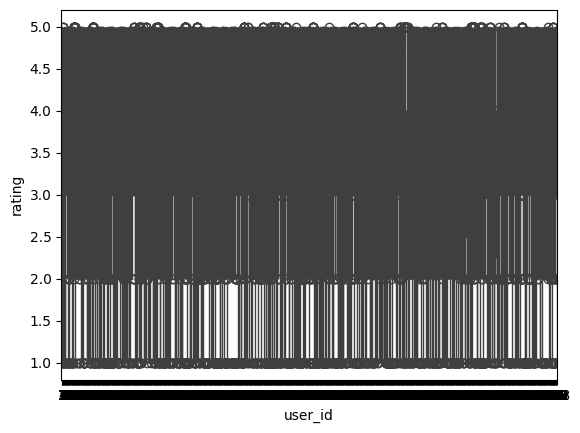

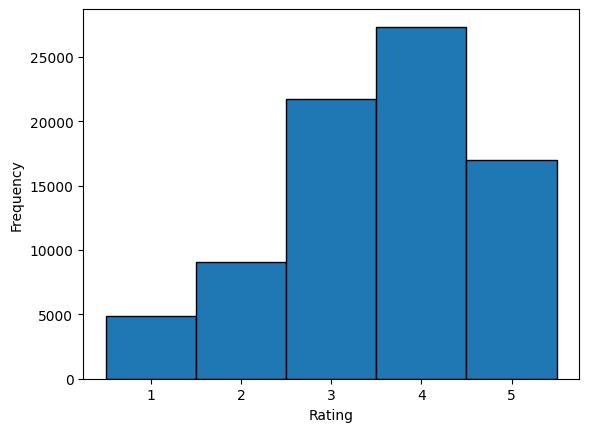

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
sns.boxplot(x="user_id", y="rating", data=train_data_stratified)
plt.show()

# Histogram
plt.hist(
    train_data_stratified["rating"],
    bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
    edgecolor="black",
)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()